<a href="https://colab.research.google.com/github/DaniilAszn/Applied_statistics/blob/main/2_1_%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Корреляции

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

Будем использовать небольшой набор данных по тому, как люди платят чаевые.

In [7]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
# новая переменная - процент чаевых от счёта
df['tip_pct'] = 100 * df['tip'] / df['total_bill']

**Посмотрим как между собой взаимосвязаны счёт, чаевые и пол клиента.**

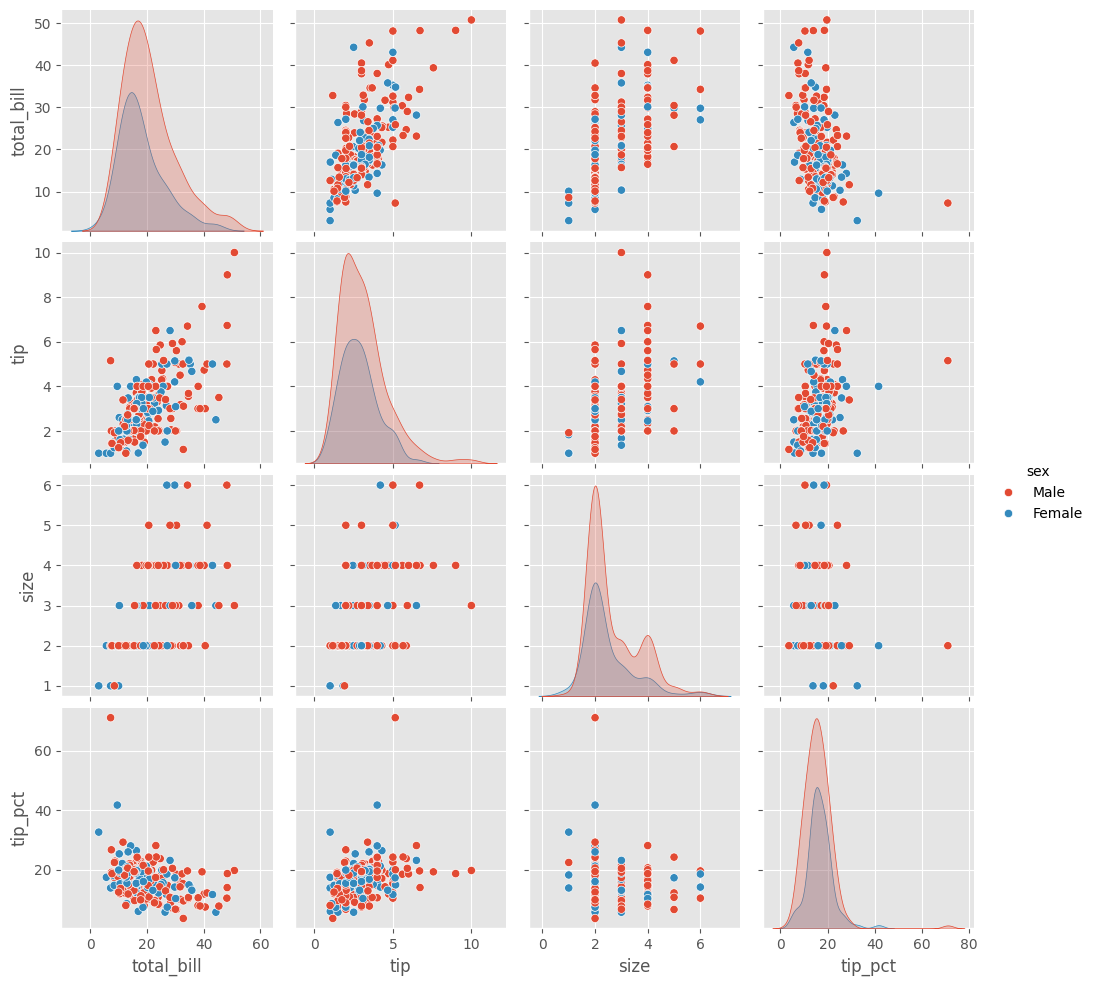

In [25]:
sns.pairplot(data=df, hue='sex', height=2.5, kind='scatter'); #kind = 'reg'

Выводы:

* Видно, что общий счёт и величина чаевых зависят друг от друга: чем больше счёт, тем больше чаевых оставляют, с долей одобной взаимосвязи не видно
* Пол никак не влияет на то, какое количество чаевых оставлено, красные и синие точки на графиках распределены равномерно, плотности на диагонали выглядят похожим образом.

**Посмотрим на разбиение по дням недели.**

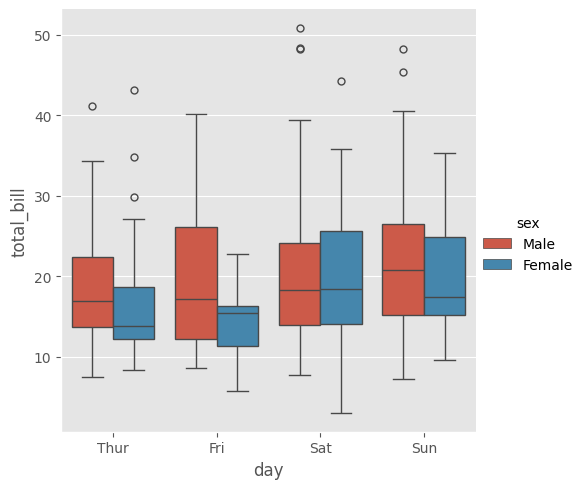

In [24]:
sns.catplot(x='day', y='total_bill', hue='sex', data=df, kind='box');

* Почему-то в пятницу мужчины платят больше чаевых, чем женщины. Вероятно, это связано со свиданиями в этот день.

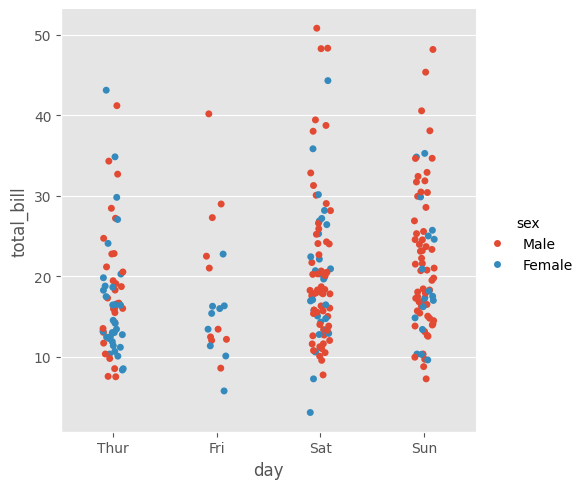

In [26]:
sns.catplot(x='day', y='total_bill', hue='sex', data=df);

* Всё просто, в выборке мало данных по пятнице. Из-за этого такая разница по чаевым.

**Можно посмотреть на взаимосвязь только двух переменных.**

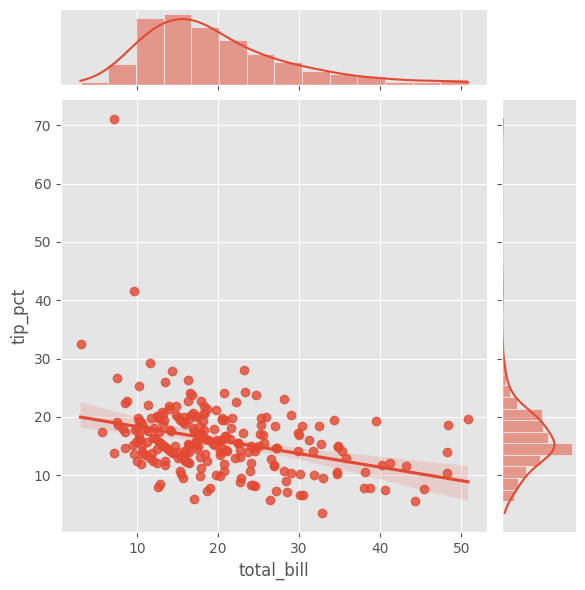

In [28]:
sns.jointplot(x='total_bill', y='tip_pct', data=df, kind='reg');

Попробуем взять логарифмы

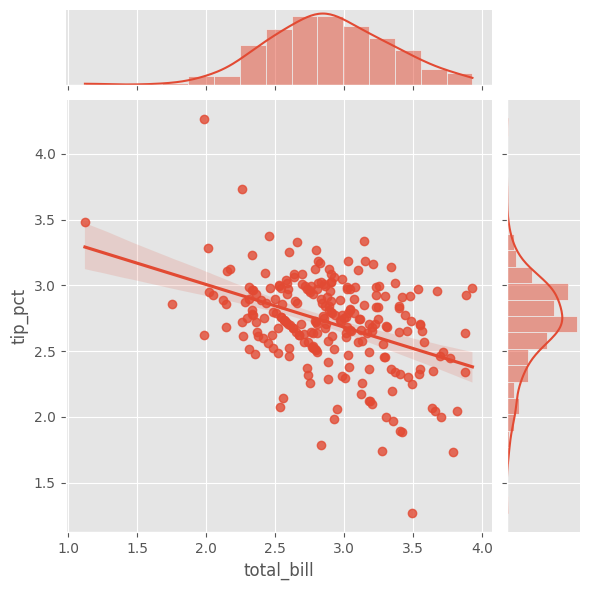

In [29]:
df_log = df[['total_bill', 'tip_pct']].apply(np.log)
sns.jointplot(x='total_bill', y='tip_pct', data=df_log, kind='reg');

**Посмотрим на ковариационную матрицу.**

In [38]:
df_1 = df[['total_bill', 'tip', 'tip_pct', 'size']]

In [39]:
print(df_1.corr(method='pearson'))

            total_bill       tip   tip_pct      size
total_bill    1.000000  0.675734 -0.338624  0.598315
tip           0.675734  1.000000  0.342370  0.489299
tip_pct      -0.338624  0.342370  1.000000 -0.142860
size          0.598315  0.489299 -0.142860  1.000000


In [40]:
print(df_1.corr(method='spearman'))

            total_bill       tip   tip_pct      size
total_bill    1.000000  0.678968 -0.320680  0.604791
tip           0.678968  1.000000  0.396186  0.468268
tip_pct      -0.320680  0.396186  1.000000 -0.152211
size          0.604791  0.468268 -0.152211  1.000000


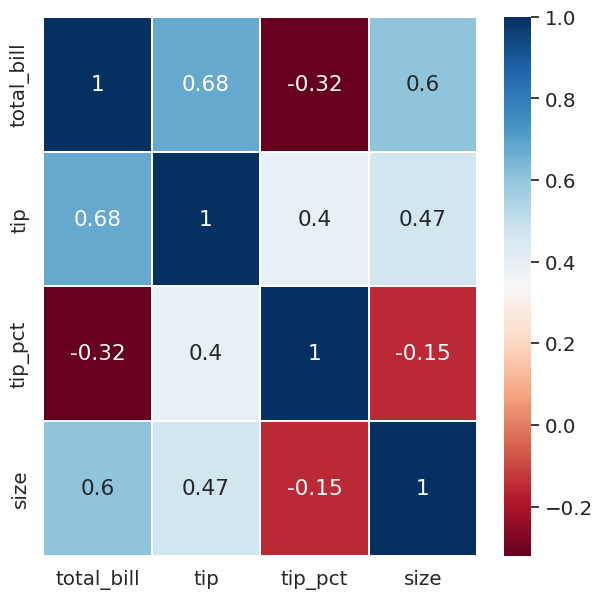

In [50]:
sns.set(font_scale=1.3)
plt.subplots(figsize=(7, 7))
sns.heatmap(df_1.corr(method='spearman'),
            annot=True,
            linewidths=0.1,
            cmap='RdBu');

**Пример с рангами:**

Корреляция Спирмена - коррелция Пирсона между рангами.

In [53]:
x = np.array([10, 8, 6, 7, 4, 10, 9, 5])
y = np.array([9, 9, 4, 5, 6, 8, 10, 7])
stats.spearmanr(x, y).correlation

0.644578313253012

In [54]:
stats.pearsonr(x, y).correlation

0.661879276575521